<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 2**


Esta questão aborda a aplicação prática de um problema de Ciência de Dados utilizando
Machine Learning. O objetivo é prever se os indivíduos irão cancelar suas reservas
em uma rede de hotéis, utilizando o conjunto de dados Hotel Booking Demand. Siga
os passos abaixo para desenvolver sua solução:

# **a) Análise Descritiva dos Dados (10%)**

• Realize uma análise descritiva da base de dados.

• Inclua gráficos e tabelas para explorar as características dos dados.

In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hotel-booking-demand


In [3]:
# Ler base

df = pd.read_csv(path + '/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Checar valores nulos

df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


/tmp/ipython-input-7-2644926257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='count', data=df_canceled_counts, palette='pastel')


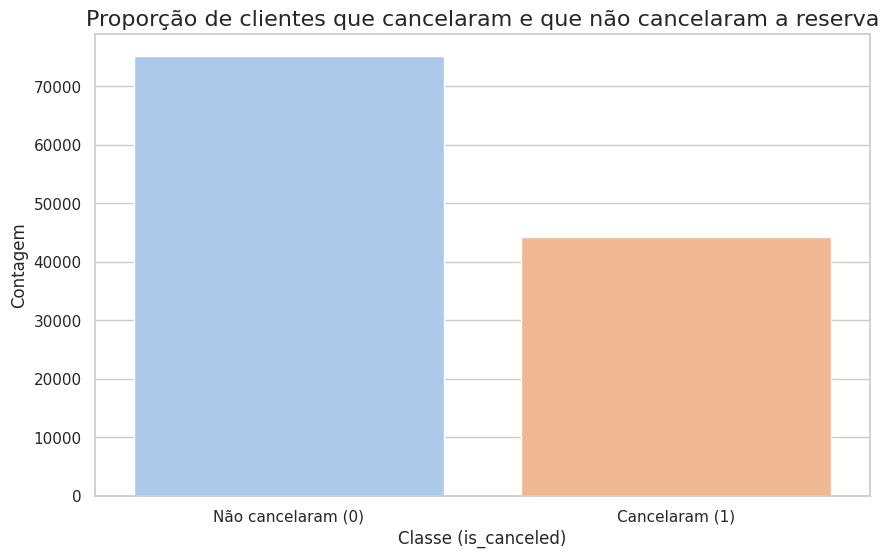

is_canceled
0    75166
1    44224
Name: count, dtype: int64
Percentual de pessoas que não cancelaram a reserva 62.96 %
Percentual de pessoas que cancelaram a reserva 37.04 %


In [7]:
# Entender a proporção da base

# Correcting the line that caused the error
df_canceled_counts = df['is_canceled'].value_counts().reset_index()
df_canceled_counts.columns = ['is_canceled', 'count']

plt.figure(figsize=(10,6))
sns.barplot(x='is_canceled', y='count', data=df_canceled_counts, palette='pastel')
plt.title("Proporção de clientes que cancelaram e que não cancelaram a reserva", fontsize=16)
plt.xlabel('Classe (is_canceled)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0,1], ['Não cancelaram (0)', 'Cancelaram (1)'])
plt.show()
print(df['is_canceled'].value_counts())
count_no_can = (df['is_canceled']==0).sum()
count_can = (df['is_canceled']==1).sum()
pct_of_no_can = count_no_can/(count_no_can+count_can)
print("Percentual de pessoas que não cancelaram a reserva", round(pct_of_no_can*100, 2), '%')
pct_of_can = count_can/(count_no_can+count_can)
print("Percentual de pessoas que cancelaram a reserva", round(pct_of_can*100, 2), '%')

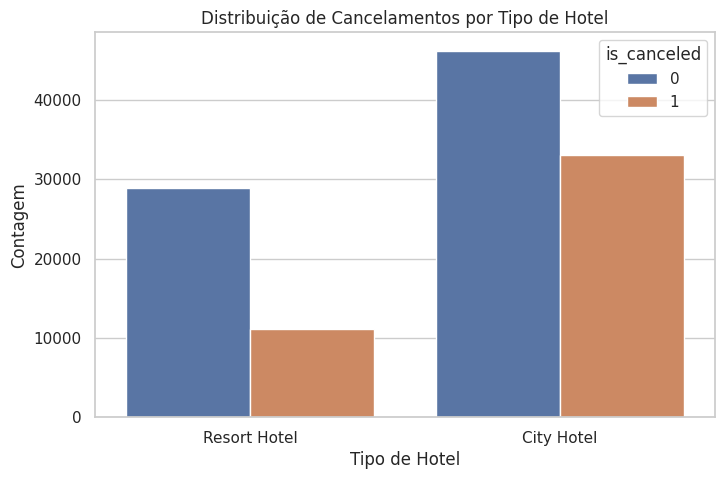

In [8]:
# Distribuição de uma variável categórica, tipo de hotel
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Distribuição de Cancelamentos por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Contagem')
plt.show()



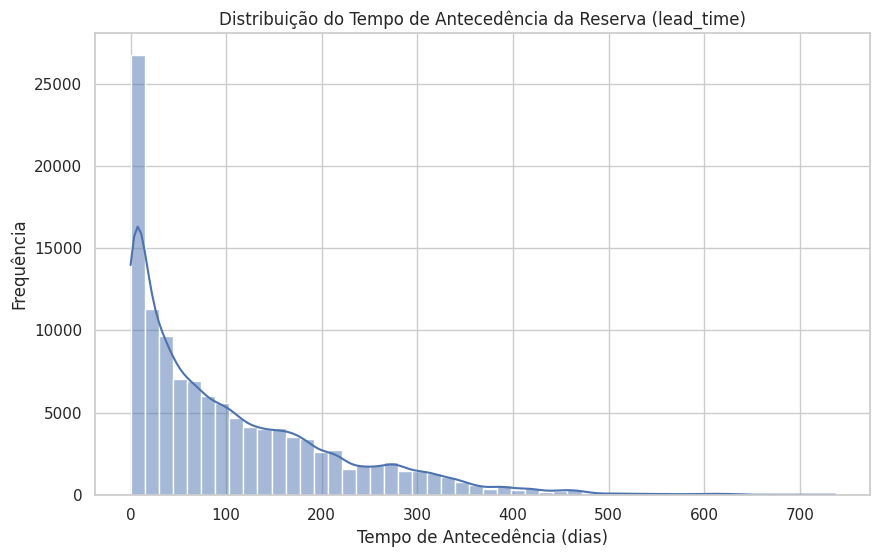

In [9]:
# Distribuição de uma variável numérica, 'lead_time'
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribuição do Tempo de Antecedência da Reserva (lead_time)')
plt.xlabel('Tempo de Antecedência (dias)')
plt.ylabel('Frequência')
plt.show()

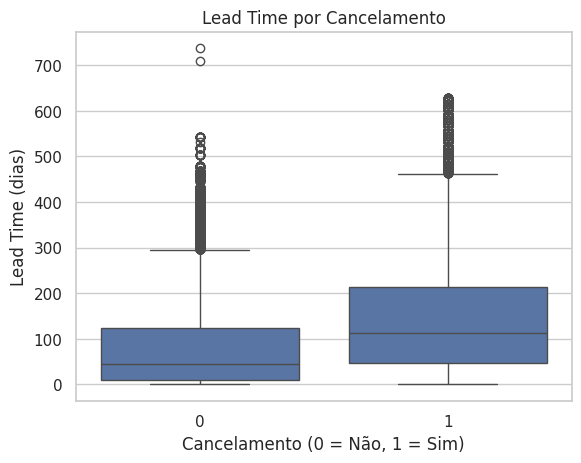

In [10]:
## Comparar o lead_time entre reservas canceladas e não canceladas

sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time por Cancelamento")
plt.xlabel("Cancelamento (0 = Não, 1 = Sim)")
plt.ylabel("Lead Time (dias)")
plt.show()

Text(0.5, 1.0, 'Cancelamentos por Tipo de Cliente')

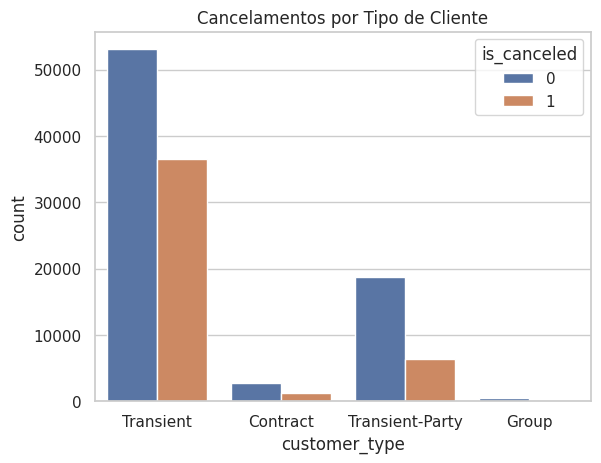

In [22]:
## Verificar a influência do tipo de cliente

sns.countplot(data=df, x='customer_type', hue='is_canceled')
plt.title("Cancelamentos por Tipo de Cliente")

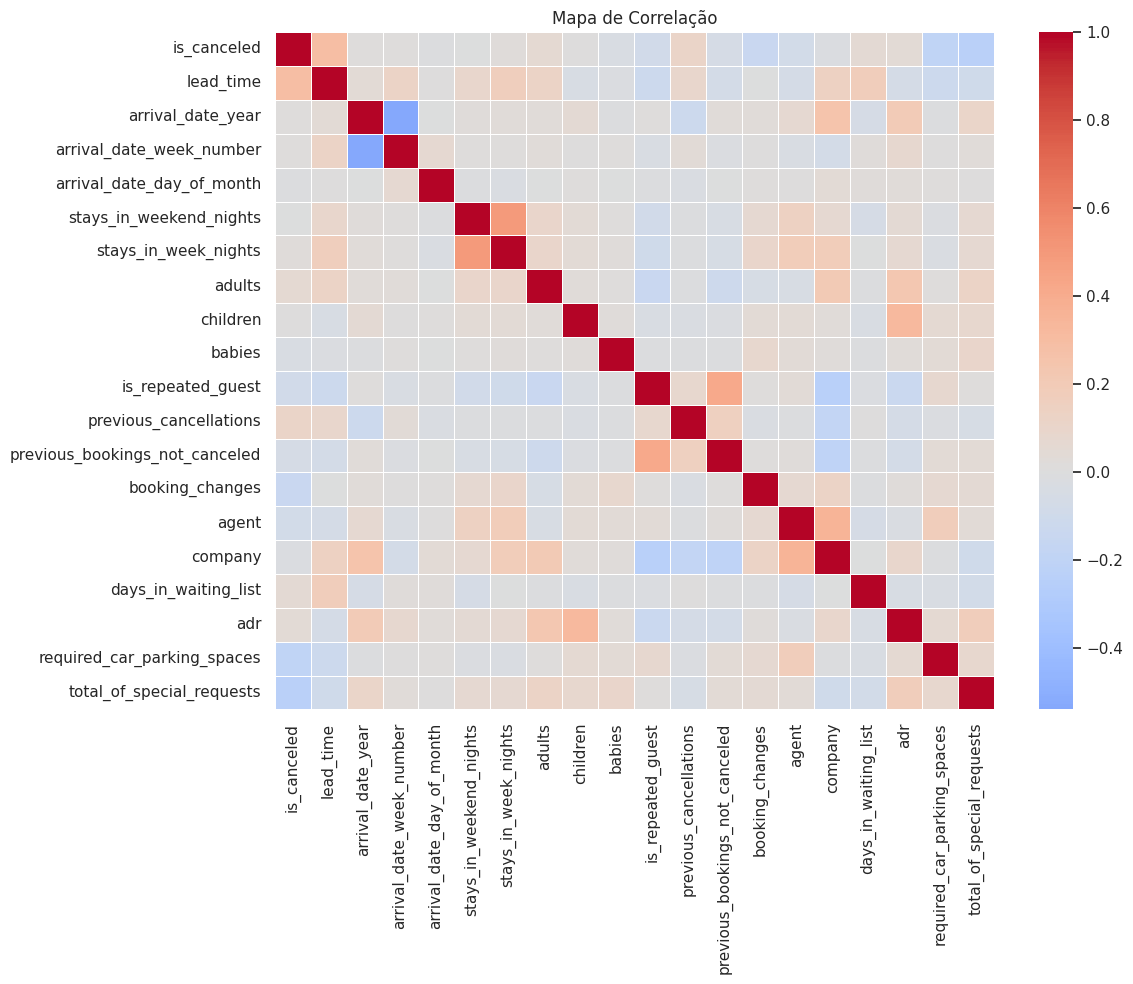

In [12]:
# Correlação entre variáveis numéricas (após tratamento de nulos)
# Preencher nulos em 'children' com 0
df['children'].fillna(0)

# Selecionar apenas colunas numéricas para a matriz de correlação
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
# Matriz de correlação
corr = df[numeric_cols].corr()
# Heatmap (mapa de calor) da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.4)
plt.title("Mapa de Correlação")
plt.tight_layout()
plt.show()

A análise descritiva inicial revela a estrutura do dataset, permitindo identificar o número de entradas, a presença de valores nulos e a distribuição geral das variáveis. A visualização da variável is_canceled é crucial para entender o desbalanceamento das classes, o que pode influenciar a escolha de métricas de avaliação e técnicas de modelagem. A correlação entre as variáveis numéricas também fornece insights sobre as relações dentro dos dados, que podem ser importantes para a seleção de features.

# **b) Modelo de Regressão Logística (60%)**

• Construa um modelo de Regressão Logística para prever o cancelamento das
reservas.

• Apresente as métricas de desempenho do modelo, como acurácia, precisão,
recall e F1-score.

In [13]:
# Copiar o dataframe para evitar modificar o original
df_model = df.copy()

# Remover colunas com muitos valores ausentes or que não são relevantes para o modelo
# Ensure 'arrival_date_month' is dropped here
df_model.drop(columns=['company', 'agent', 'reservation_status_date', 'arrival_date_month', 'reservation_status'], inplace=True)

# Tratamento de valores ausentes (se não foi feito antes)
df_model['children'].fillna(0, inplace=True)
df_model['country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-13-1784545498.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['children'].fillna(0, inplace=True)
/tmp/ipython-input-13-1784545498.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [16]:
# Separar features (X) e variável alvo (y)
X = df_model.drop('is_canceled', axis=1)
y = df_model['is_canceled']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify para manter a proporção da variável alvo

# # Construir o pipeline: pré-processamento + modelo de Regressão Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000))])


In [17]:
# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades para AUC


In [18]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n--- Métricas de Desempenho do Modelo de Regressão Logística ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"\nMatriz de Confusão:\n{conf_matrix}")


--- Métricas de Desempenho do Modelo de Regressão Logística ---
Acurácia: 0.8114
Precisão: 0.7306
Recall: 0.7776
F1-score: 0.7534
AUC-ROC: 0.8960

Matriz de Confusão:
[[18745  3805]
 [ 2950 10317]]


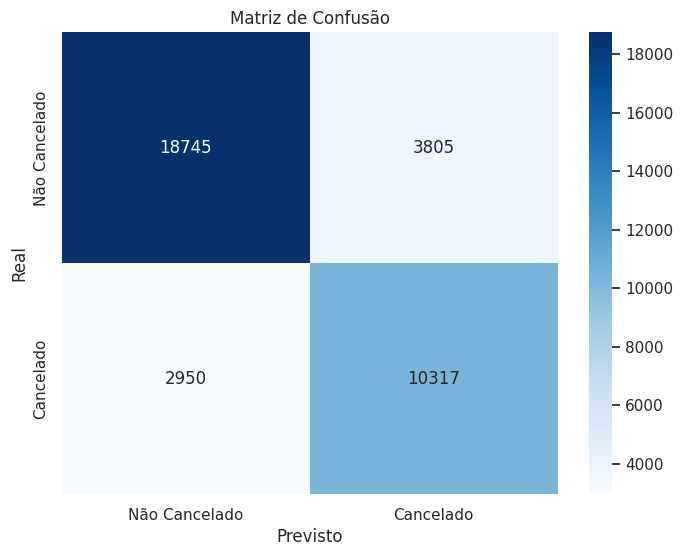

In [19]:
# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Cancelado', 'Cancelado'],
            yticklabels=['Não Cancelado', 'Cancelado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

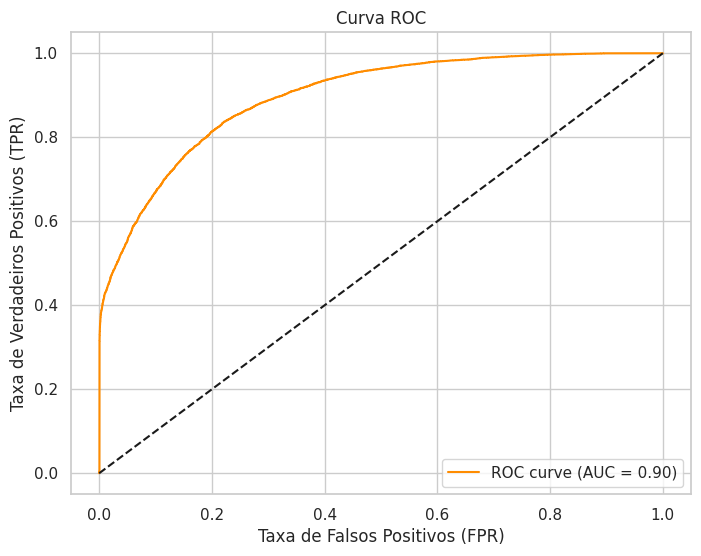

In [20]:
# Curva ROC e AUC

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("F1-score médio em CV:", scores.mean())

F1-score médio em CV: 0.585610357889194


# **c) Análise das Features (20%)**

• Identifique as features mais importantes para o cancelamento das reservas.
• Interprete os resultados, destacando quais variáveis têm maior impacto na
previsão.

# **d) Justificativa do Método (10%)**

• Explique por que a Regressão Logística é mais apropriada para este problema
em comparação à Regressão Linear.